In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/home/drew/School/Semester4/ML1/NewYorkCityCrimes2015/Data/Lab2_Daily_Crime_Volume_Data/Training_and_Test_Set.csv',
                parse_dates = ['CMPLNT_FR_DT'])

In [3]:
# Crimes PER DAY PER GEOCELL
df.head(10)

,CMPLNT_FR_DT,Daytime,Day_Name,Month,Day,Year,Season,GeoCell,BORO_NM,PRCP,...,TMIN,TMAX,Population,PC_INCOME,Hm_Sls_Price_Range,Holiday,Event,is_Holiday,is_Event,count_cmplnt
0,2014-11-26,Morning,Wednesday,November,26.0,2014.0,Fall,66.0,QUEENS,1.24,...,34,51,"2,250,002",40997,Medium,NaN,NaN,0,0,1
1,2014-12-01,Late Night,Monday,December,1.0,2014.0,Winter,60.0,QUEENS,0.09,...,42,65,"2,250,002",40997,Medium,NaN,NaN,0,0,1
2,2015-11-10,Morning,Tuesday,November,10.0,2015.0,Fall,15.0,BROOKLYN,0.26,...,51,57,"2,552,911",43915,High,NaN,NaN,0,0,2
3,2014-02-04,Morning,Tuesday,February,4.0,2014.0,Winter,48.0,QUEENS,0.00,...,22,35,"2,250,002",40997,Medium,NaN,NaN,0,0,3
4,2015-08-25,Late Night,Tuesday,August,25.0,2015.0,Summer,35.0,BROOKLYN,0.00,...,73,90,"2,552,911",43915,High,NaN,NaN,0,0,1
5,2014-09-03,Morning,Wednesday,September,3.0,2014.0,Fall,23.0,STATEN ISLAND,0.00,...,72,86,"468,730",48123,Low,NaN,US Open Tennis,0,1,1
6,2015-09-17,Morning,Thursday,September,17.0,2015.0,Fall,49.0,QUEENS,0.00,...,68,89,"2,250,002",44031,Medium,NaN,New York Boat Show,0,1,7
7,2015-01-29,Morning,Thursday,January,29.0,2015.0,Winter,35.0,BROOKLYN,0.02,...,19,36,"2,552,911",43915,High,NaN,NaN,0,0,5
8,2015-03-12,Evening,Thursday,March,12.0,2015.0,Spring,67.0,QUEENS,0.00,...,36,47,"2,250,002",44031,Medium,NaN,NaN,0,0,1
9,2014-06-23,Late Night,Monday,June,23.0,2014.0,Summer,48.0,QUEENS,0.00,...,65,81,"2,250,002",40997,Medium,NaN,NaN,0,0,3


In [4]:
df['DayOfWeek'] = df['CMPLNT_FR_DT'].dt.dayofweek

In [5]:
df['Month_No'] = df['CMPLNT_FR_DT'].dt.month

In [6]:
list(df)

['CMPLNT_FR_DT',
 'Daytime',
 'Day_Name',
 'Month',
 'Day',
 'Year',
 'Season',
 'GeoCell',
 'BORO_NM',
 'PRCP',
 'SNOW',
 'TMIN',
 'TMAX',
 'Population',
 'PC_INCOME',
 'Hm_Sls_Price_Range',
 'Holiday',
 'Event',
 'is_Holiday',
 'is_Event',
 'count_cmplnt',
 'DayOfWeek',
 'Month_No']

In [7]:
df['Population'] = pd.to_numeric(df['Population'].str.replace(',','', regex = False))

In [8]:
KNNdf = df.drop(['Holiday', 'Event', 'Day_Name', 'Month', 'BORO_NM', 'PC_INCOME', 'Hm_Sls_Price_Range', 'Season', 'CMPLNT_FR_DT'], axis = 1)
KNNdf = pd.get_dummies(KNNdf)

In [9]:
KNNdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170650 entries, 0 to 170649
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Day                    170650 non-null  float64
 1   Year                   170650 non-null  float64
 2   GeoCell                170650 non-null  float64
 3   PRCP                   170650 non-null  float64
 4   SNOW                   170650 non-null  float64
 5   TMIN                   170650 non-null  int64  
 6   TMAX                   170650 non-null  int64  
 7   Population             170650 non-null  int64  
 8   is_Holiday             170650 non-null  int64  
 9   is_Event               170650 non-null  int64  
 10  count_cmplnt           170650 non-null  int64  
 11  DayOfWeek              170650 non-null  int64  
 12  Month_No               170650 non-null  int64  
 13  Daytime_Day            170650 non-null  uint8  
 14  Daytime_Early Morning  170650 non-nu

In [12]:
from sklearn.model_selection import train_test_split
X = KNNdf.drop(['count_cmplnt'], axis = 1)
y = KNNdf['count_cmplnt']
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaleFit = scaler.fit(X_train_unscaled)
X_train = scaleFit.transform(X_train_unscaled)
X_test = scaleFit.transform(X_test_unscaled)

In [75]:
# Uniform
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]}
clf = GridSearchCV(KNeighborsRegressor(), params, cv = 3, scoring = 'neg_root_mean_squared_error')
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='neg_root_mean_squared_error')

In [76]:
clf.cv_results_

{'mean_fit_time': array([6.76546558, 7.52691515, 8.36787009, 8.2894121 , 6.88587205,
        6.99016913, 8.13481752, 8.05471516, 7.83318297, 8.23096307,
        7.69670884, 6.951955  , 7.01159644, 7.0040741 , 7.0415527 ,
        7.03764025, 6.88384883, 7.37154682, 7.93106532, 9.21843584,
        9.7069393 , 8.64714376, 7.28510269, 7.12631337, 7.88185581,
        6.40160767, 6.09060534, 5.00065613, 4.35827152, 4.36897739,
        4.38853661, 5.08338785, 4.61052831, 4.81862171, 4.86459152,
        4.60254852, 4.27998948, 4.31612364, 4.338497  , 4.32823332,
        4.35465773, 4.33409333, 4.3516554 , 5.66464965, 6.54719504,
        5.47053409, 7.59960302, 6.66621153, 6.69472504, 6.99987435]),
 'std_fit_time': array([0.83912826, 0.29531511, 0.02559141, 0.10686662, 0.09116821,
        0.1051616 , 0.10510857, 0.05263268, 0.58601445, 0.11991087,
        0.62819273, 0.13249883, 0.03413805, 0.04576542, 0.01304297,
        0.07670587, 0.08487515, 0.53957041, 0.71196041, 1.12164285,
        0.906

In [131]:
#1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
paramsweighted = {'n_neighbors':range(1,126),
         'weights':['distance']}
clfWeighted = GridSearchCV(KNeighborsRegressor(), paramsweighted, cv = 3, scoring = 'neg_root_mean_squared_error')
clfWeighted.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 501), 'weights': ['distance']},
             scoring='neg_root_mean_squared_error')

In [132]:
clfWeighted.cv_results_

{'mean_fit_time': array([ 5.42083526,  5.41811196,  5.53184899,  5.51343385,  5.50885328,
         5.50826303,  5.64177203,  5.48017327,  5.5077761 ,  5.47382673,
         5.46904262,  5.47278412,  5.47563378,  5.48662798,  5.48664474,
         5.45869215,  5.43959602,  5.44383963,  5.43752019,  5.43612862,
         5.42737007,  5.4217484 ,  5.42614396,  5.43889976,  5.46511738,
         5.52944557,  5.48633138,  5.47938315,  5.59014567,  5.50151634,
         6.86291424,  7.10630862,  8.45218102,  9.00029302,  8.40688856,
         5.92476233,  4.34827185,  4.34396768,  7.01551596,  7.45271603,
         8.7383968 ,  8.46791005,  8.8709507 ,  8.05557728,  7.28760751,
         8.98920218,  9.00757726,  8.97649686,  8.86255582, 10.51857328,
         9.23257494,  9.98703067,  9.24360148,  8.43929911,  9.35602299,
         7.51057522,  7.05760749,  9.06178975, 11.9265581 , 11.73117264,
         8.36278637,  5.75526102,  4.65993269,  4.27026916,  4.80557998,
         5.73373898,  5.7536815 , 

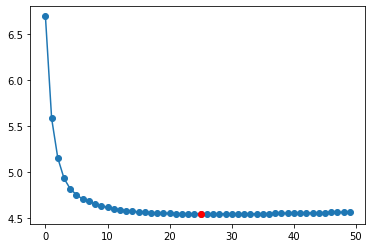

In [133]:
plt.plot(abs(clf.cv_results_['mean_test_score']), marker = 'o')
plt.plot(clf.best_index_, abs(clf.best_score_), marker = 'o', color = 'red')

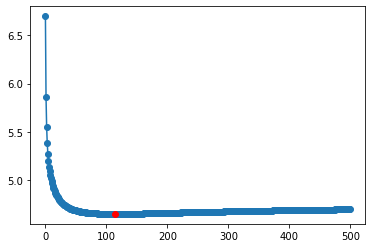

In [134]:
plt.plot(abs(clfWeighted.cv_results_['mean_test_score']), marker = 'o')
plt.plot(clfWeighted.best_index_, abs(clfWeighted.best_score_), marker = 'o', color = 'red')

In [64]:
print('The best non-weighted k is', '25', 'with a root mean squared error of', '4.541938998318994')
print('The best weighted k is', '115', 'with a root mean squared error of', '4.6503048395451145')


The best non-weighted k is 25 with a root mean squared error of 4.541938998318994
The best weighted k is 115 with a root mean squared error of 4.6503048395451145


In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
model1 = KNeighborsRegressor(n_neighbors = 25, weights = 'uniform')
model1fit = model1.fit(X_train, y_train)
predz = model1fit.predict(X_test)
print('The RMSE of the test set using a non-weighted KNN model with K = 25 is', mean_squared_error(y_test,predz, squared = False))
print('The MAE of the test set using a non-weighted KNN model with K = 25 is', mean_absolute_error(y_test,predz))

The RMSE of the test set using a non-weighted KNN model with K = 25 is 4.614308202484779
The MAE of the test set using a non-weighted KNN model with K = 25 is 3.1304893055962495


In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
model2 = KNeighborsRegressor(n_neighbors = 115, weights = 'distance')
model2fit = model2.fit(X_train, y_train)
predz = model2fit.predict(X_test)
print('The RMSE of the test set using a weighted KNN model with K = 115 is', mean_squared_error(y_test,predz, squared = False))
print('The MAE of the test set using a weighted KNN model with K = 115 is', mean_absolute_error(y_test,predz))

The RMSE of the test set using a weighted KNN model with K = 115 is 4.72525055874405
The MAE of the test set using a weighted KNN model with K = 115 is 3.19833053952896


In [17]:
holdOut = pd.read_csv('/home/drew/School/Semester4/ML1/NewYorkCityCrimes2015/Data/Lab2_Daily_Crime_Volume_Data/Hold_Out_Set.csv', parse_dates = ['CMPLNT_FR_DT'])


In [18]:
holdOut['DayOfWeek'] = holdOut['CMPLNT_FR_DT'].dt.dayofweek

In [19]:
holdOut['Month_No'] = holdOut['CMPLNT_FR_DT'].dt.month

In [20]:
holdOut['Population'] = pd.to_numeric(holdOut['Population'].str.replace(',','', regex = False))

In [21]:
holdOutKNNdf = holdOut.drop(['Holiday', 'Event', 'Day_Name', 'Month', 'BORO_NM', 'PC_INCOME', 'Hm_Sls_Price_Range', 'Season', 'CMPLNT_FR_DT'], axis = 1)
holdOutKNNdf = pd.get_dummies(holdOutKNNdf)

In [22]:
KNNdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170650 entries, 0 to 170649
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Day                    170650 non-null  float64
 1   Year                   170650 non-null  float64
 2   GeoCell                170650 non-null  float64
 3   PRCP                   170650 non-null  float64
 4   SNOW                   170650 non-null  float64
 5   TMIN                   170650 non-null  int64  
 6   TMAX                   170650 non-null  int64  
 7   Population             170650 non-null  int64  
 8   is_Holiday             170650 non-null  int64  
 9   is_Event               170650 non-null  int64  
 10  count_cmplnt           170650 non-null  int64  
 11  DayOfWeek              170650 non-null  int64  
 12  Month_No               170650 non-null  int64  
 13  Daytime_Day            170650 non-null  uint8  
 14  Daytime_Early Morning  170650 non-nu

In [23]:
from sklearn.model_selection import train_test_split
holdoutX = holdOutKNNdf.drop(['count_cmplnt'], axis = 1)
holdouty = holdOutKNNdf['count_cmplnt']
holdoutX_train_unscaled, holdoutX_test_unscaled, holdouty_train, holdouty_test = train_test_split(holdoutX, holdouty, test_size=0.3, random_state=12345)

In [24]:
from sklearn.preprocessing import StandardScaler
holdoutX_train = scaleFit.transform(holdoutX_train_unscaled)
holdoutX_test = scaleFit.transform(holdoutX_test_unscaled)

In [25]:
predz = model1fit.predict(holdoutX_test)
print('The RMSE of the holdout set using a non-weighted KNN model with K = 25 is', mean_squared_error(holdouty_test,predz, squared = False))
print('The MAE of the holdout set using a non-weighted KNN model with K = 25 is', mean_absolute_error(holdouty_test,predz))

The RMSE of the holdout set using a non-weighted KNN model with K = 25 is 4.5201576061761575
The MAE of the holdout set using a non-weighted KNN model with K = 25 is 3.094104412023203


In [26]:
predz = model2fit.predict(holdoutX_test)
mean_squared_error(holdouty_test,predz, squared = False)
print('The RMSE of the holdout set using a weighted KNN model with K = 115 is', mean_squared_error(holdouty_test,predz, squared = False))
print('The MAE of the holdout set using a weighted KNN model with K = 115 is', mean_absolute_error(holdouty_test,predz))

The RMSE of the holdout set using a weighted KNN model with K = 115 is 4.647002212641025
The MAE of the holdout set using a weighted KNN model with K = 115 is 3.174395263852886


|Model|K|Training|Test Set RMSE|Holdout Set RMSE|Test Set MAE|Holdout Set MAE|
|:--|:-:|:-:|:-:|:-:|:-:|:-:|
|Non-Weighted KNN|25|4.54|4.61|4.52|3.13|3.09|
|Weighted KNN|115|4.65|4.73|4.65|3.19|3.17|